## **Set de datos SaratogaHouses**

El set de datos SaratogaHouses contiene información sobre el precio de 1728 viviendas situadas en Saratoga County, New York, USA en el año 2006. Además del precio, incluye 15 variables adicionales:

price: precio de la vivienda.
lotSize: metros cuadrados de la vivienda.
age: antigüedad de la vivienda.
landValue: valor del terreno.
livingArea: metros cuadrados habitables.
pctCollege: porcentaje del vecindario con título universitario.
bedrooms: número de dormitorios.
firplaces: número de chimeneas.
bathrooms: número de cuartos de baño (el valor 0.5 hace referencia a cuartos de baño sin ducha).
rooms: número de habitaciones.
heating: tipo de calefacción.
fuel: tipo de alimentación de la calefacción (gas, electricidad o diesel).
sewer: tipo de desagüe.
waterfront: si la vivienda tiene vistas al lago.
newConstruction: si la vivienda es de nueva construcción.
centralAir: si la vivienda tiene aire acondicionado.

### **Objetivo del Modelo:** Obtener un modelo capaz de predecir la categoria del inmueble (Costoso (0) - Moderado (1))


In [ ]:
import numpy as np
import pandas as pd
from tabulate import tabulate
%matplotlib inline
import pylab as pl
import pandas as pd
import seaborn as sns; sns.set()
from sklearn import preprocessing
from sklearn import datasets
import matplotlib.pyplot as plt

In [ ]:
datos = pd.read_csv("SaratogaHouses.csv", sep=";")

In [ ]:
datos.columns = ["categoria_precio", "precio", "metros_totales", "antiguedad", "precio_terreno",
                 "metros_habitables", "universitarios", "dormitorios", 
                 "chimenea", "banos", "habitaciones", "calefaccion",
                 "consumo_calefaccion", "desague", "vista_lago",
                 "nueva_construccion", "aire_acondicionado"]

In [ ]:
datos.head(4)

,categoria_precio,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,chimenea,banos,habitaciones,calefaccion,consumo_calefaccion,desague,vista_lago,nueva_construccion,aire_acondicionado
0,0,5000,0.29,4,35800,1700,63,3,1,2.5,6,hot air,gas,public/commercial,No,No,Yes
1,0,10300,0.16,20,15700,912,54,2,1,1.5,4,electric,electric,public/commercial,No,No,No
2,0,10300,0.16,20,15700,912,54,2,1,1.5,6,electric,electric,public/commercial,No,No,No
3,0,20000,0.52,59,8000,936,20,2,0,1.0,4,hot air,oil,septic,No,No,No


In [ ]:
clean_data = {"calefaccion": {"electric": 1, "hot water/steam": 2, "hot air": 3},
              "consumo_calefaccion": {"electric": 1, "gas": 2, "oil": 3},
              "desague": {"septic": 1, "public/commercial":2, "none": 3},
              "vista_lago": {"No": 1, "Yes":2},         
              "nueva_construccion": {"No": 1, "Yes":2},
              "aire_acondicionado": {"No": 1, "Yes":2}}                            

In [ ]:
datos.replace(clean_data, inplace=True)

In [ ]:
datos

,categoria_precio,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,chimenea,banos,habitaciones,calefaccion,consumo_calefaccion,desague,vista_lago,nueva_construccion,aire_acondicionado
0,0,5000,0.29,4,35800,1700,63,3,1,2.5,6,3,2,2,1,1,2
1,0,10300,0.16,20,15700,912,54,2,1,1.5,4,1,1,2,1,1,1
2,0,10300,0.16,20,15700,912,54,2,1,1.5,6,1,1,2,1,1,1
3,0,20000,0.52,59,8000,936,20,2,0,1.0,4,3,3,1,1,1,1
4,0,25000,0.21,75,900,920,44,2,0,1.0,6,3,3,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,1,670000,0.11,121,87000,2247,62,4,0,2.0,8,2,2,2,1,1,1
1724,1,725000,0.21,3,70600,2586,62,4,1,3.0,10,3,2,2,1,1,2
1725,1,760000,1.22,2,194700,3148,57,5,0,3.5,12,3,2,1,1,1,2
1726,1,775000,0.00,5,412600,2472,57,3,1,2.5,9,3,2,1,2,1,2


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   categoria_precio     1728 non-null   int64  
 1   precio               1728 non-null   int64  
 2   metros_totales       1728 non-null   float64
 3   antiguedad           1728 non-null   int64  
 4   precio_terreno       1728 non-null   int64  
 5   metros_habitables    1728 non-null   int64  
 6   universitarios       1728 non-null   int64  
 7   dormitorios          1728 non-null   int64  
 8   chimenea             1728 non-null   int64  
 9   banos                1728 non-null   float64
 10  habitaciones         1728 non-null   int64  
 11  calefaccion          1728 non-null   int64  
 12  consumo_calefaccion  1728 non-null   int64  
 13  desague              1728 non-null   int64  
 14  vista_lago           1728 non-null   int64  
 15  nueva_construccion   1728 non-null   i

In [ ]:
 # Función para graficar datos (X,y)

def plot_data(X, y):  
    y_unique = np.unique(y)
    colors = pl.cm.rainbow(np.linspace(0.0, 1.0, y_unique.size))
    for this_y, color in zip(y_unique, colors):
        this_X = X[y == this_y]
        pl.scatter(this_X[:, 0], this_X[:, 1],  c=color,
                    alpha=0.5, edgecolor='k',
                    label="Class %s" % this_y)
    pl.legend(loc="best")
    pl.title("Data")

In [ ]:
# Función para visualizar la superficie de decisión de nuestro algoritmo.

def plot_decision_region(X, pred_fun):      
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    x_vals = np.linspace(min_x, max_x, 100)
    y_vals = np.linspace(min_y, max_y, 100)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    ZZ = np.zeros((grid_r, grid_c))
    for i in range(grid_r):
        for j in range(grid_c):
            ZZ[i, j] = pred_fun(XX[i, j], YY[i, j])
    pl.contourf(XX, YY, ZZ, 100, cmap = pl.cm.coolwarm, vmin= -1, vmax=2)
    pl.colorbar()
    pl.xlabel("x")
    pl.ylabel("y")
    
def gen_pred_fun(clf):
    def pred_fun(x1, x2):
        x = np.array([[x1, x2]])
        return clf.predict(x)[0]
    return pred_fun

In [ ]:
# Función para generar de una forma más visual la matriz de confusión

def list_cm(cm,classes):    
    if len(cm)==2:
      row_0 =['','Valor','Verdadero']
      row_1 =['-',classes[0],classes[1]]
      row_2 =[classes[0],cm[0,0],cm[1,0]]
      row_3 =[classes[1],cm[0,1],cm[1,1]]
      table = zip(row_0,row_1, row_2, row_3)
      headers = ['', '', 'Valor', 'Predicho']  
      return print(tabulate(table, headers=headers, floatfmt=".4f"))
    else:
      row_0 =['','Valor','Verdadero','']
      row_1 =['-',classes[0],classes[1],classes[2]]
      row_2 =[classes[0],cm[0,0],cm[1,0],cm[2,0]]
      row_3 =[classes[1],cm[0,1],cm[1,1],cm[2,1]]
      row_4 =[classes[2],cm[0,2],cm[1,2],cm[2,2]]
      table = zip(row_0,row_1, row_2, row_3, row_4)
      headers = ['', '', 'Valor', 'Predicho', '']  
      return print(tabulate(table, headers=headers, floatfmt=".4f"))   

In [ ]:
# Función make_blobs de scikit learn para generar un conjunto de datos sintéticos: Quitar

from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=0)
print(X.shape)
print(y.shape)
y

(100, 2)
(100,)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


array([1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1])

In [ ]:
# Modelo LogisticRegression usando Scikit-Learn
from sklearn.linear_model import LogisticRegression

In [ ]:
# Creamos un modelo de tipo LogisticRegression
classifier = LogisticRegression()
cl2 = LogisticRegression(C=1.5)

In [ ]:
X = datos[["precio", "metros_totales", "antiguedad", "precio_terreno",
                 "metros_habitables", "universitarios", "dormitorios", 
                 "chimenea", "banos", "habitaciones", "calefaccion",
                 "consumo_calefaccion", "desague", "vista_lago",
                 "nueva_construccion", "aire_acondicionado"]]
y= datos["categoria_precio"]


classifier.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
np.unique(y, return_counts=True)

(array([0, 1]), array([866, 862]))

In [ ]:
# Parámetros del estimador que se está entrenando, se llama la función classifier.get_params().
classifier.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# Explicación de los parámetros:
# Fase de predicción, se llama predict().
classifier.predict(X)

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
# Fase de evaluación, se llama score().
classifier.score(X, y)

0.8495370370370371

In [ ]:
from sklearn.metrics import confusion_matrix
from tabulate import tabulate
prediction = classifier.predict(X)
cnf_matrix = confusion_matrix(y, prediction)

In [ ]:
print(cnf_matrix)

[[722 144]
 [116 746]]


In [ ]:
accuracy=(722+746)/(722+144+116+746)
accuracy

0.8495370370370371

In [ ]:
class_names = datos["categoria_precio"]
list_cm(cnf_matrix,class_names)

                  Valor    Predicho
---------  --  --------  ----------
           -     0.0000      0.0000
Valor      0   722.0000    144.0000
Verdadero  0   116.0000    746.0000


In [ ]:
from sklearn import metrics
print('Precision: {}'.format(metrics.precision_score(y, prediction)))
print('Recall: {}'.format(metrics.recall_score(y, prediction)))
print('F_1 score: {}'.format(metrics.f1_score(y, prediction)))

Precision: 0.8382022471910112
Recall: 0.8654292343387471
F_1 score: 0.8515981735159817


#**Regresión Base SaratogaHouses**

In [ ]:
X = datos[["metros_totales", "antiguedad", "precio_terreno",
                 "metros_habitables", "universitarios", "dormitorios", 
                 "chimenea", "banos", "habitaciones", "calefaccion",
                 "consumo_calefaccion", "desague", "vista_lago",
                 "nueva_construccion", "aire_acondicionado"]] # Variables explicativas
y= datos["precio"] # Variable dependiente


classifier.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

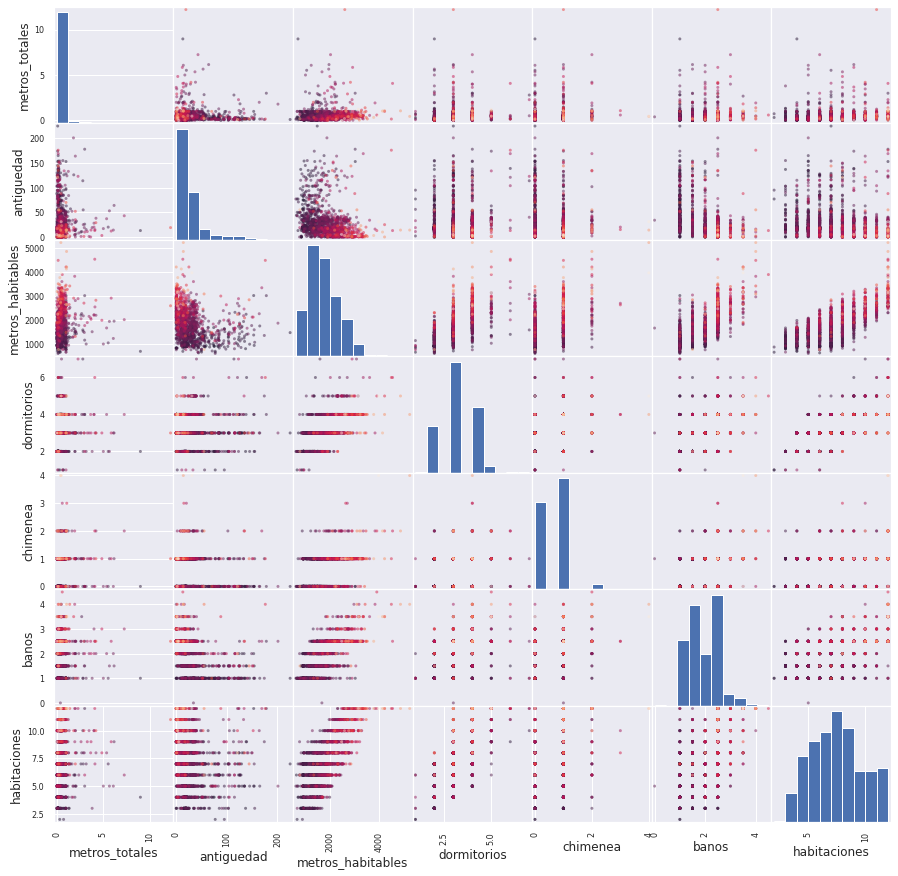

In [ ]:
#Para realizar la gráfica se eliminan algunas variables en x, para poder visualizar correctamente 

X1 = datos[["metros_totales", "antiguedad", "metros_habitables", "dormitorios", 
                 "chimenea", "banos", "habitaciones"]]
y1= datos["precio"]

pd.plotting.scatter_matrix(X1, c=y1, figsize=(15, 15));

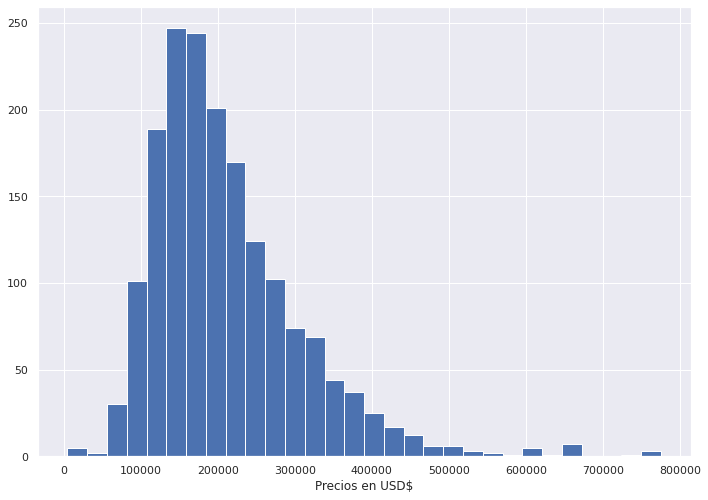

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.hist(y, bins=30)
plt.xlabel("Precios en USD$")
plt.show()

Se van a generar dos nuevos subconjuntos filtrando estas características:
    * $D_1$:  $X = \textit{'Habitaciones'}$, $y = \textit{'precio'}$
    * $D_2$:  $X = \textit{'metros_habitables'}$, $y = \textit{'precio'}$
* Para cada subconjunto, se genera una partición de entrenamiento y otra de prueba usando una proporción $70\%-30\%$
* Se entrena un modelo de regresión lineal sobre ambos subconjuntos de datos:
    * Se Reporta el error cuadrático medio sobre el conjunto de prueba
    * Se Imprime los valores de $w$ y $w_0$ de la ecuación de regresión
    * Se genera una gráfica donde visualice la línea obtenida por el modelo de regresión en conjunto con los datos de entrenamiento y los datos de prueba



Pendiente: 22719.79023018107
Intersección en y: 51227.37319272803
Error cuadrático medio: 6810308015.064263


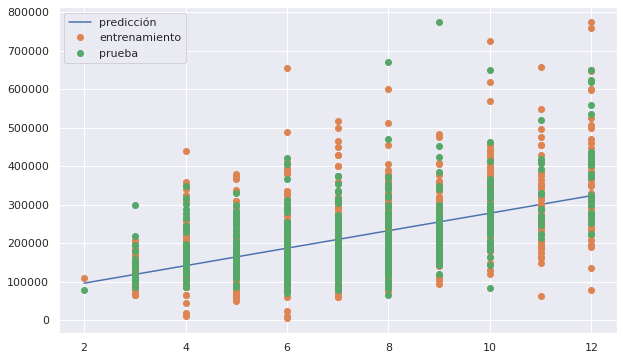

In [ ]:
#Subconjunto D1
d1=datos[["habitaciones","precio"]]


from sklearn.model_selection import train_test_split
#Se hace el Reshape de la variable X
d1_X=np.array(d1["habitaciones"])
d1_X= d1_X[:, np.newaxis]
d1_X.shape

#Partición 30-70
X_train_d1, X_test_d1, y_train_d1, y_test_d1 = train_test_split(d1_X, d1["precio"], test_size=0.3, random_state=42)

from sklearn.linear_model import LinearRegression

#Se entrena el modelo
regressor_d1 = LinearRegression()
regressor_d1.fit(X_train_d1, y_train_d1)

print('Pendiente: {}'.format(regressor_d1.coef_[0]))
print('Intersección en y: {}'.format(regressor_d1.intercept_))

from sklearn.metrics import mean_squared_error

pred = regressor_d1.predict(X_test_d1)
print('Error cuadrático medio: {}'.format(mean_squared_error(pred, y_test_d1)))

#Gráfica
from matplotlib import pyplot as plt
import pylab as pl
min_pt = d1_X.min() * regressor_d1.coef_[0] + regressor_d1.intercept_
max_pt = d1_X.max() * regressor_d1.coef_[0] + regressor_d1.intercept_

pl.figure(figsize = (10, 6))
pl.plot([d1_X.min(), d1_X.max()], [min_pt, max_pt], label="predicción")
pl.plot(X_train_d1, y_train_d1, 'o', label="entrenamiento");
pl.plot(X_test_d1, y_test_d1, 'o', label="prueba");
pl.legend(loc='best');

Pendiente: 113.34522787789929
Intersección en y: 12997.702714369661
Error cuadrático medio: 4450564451.650972


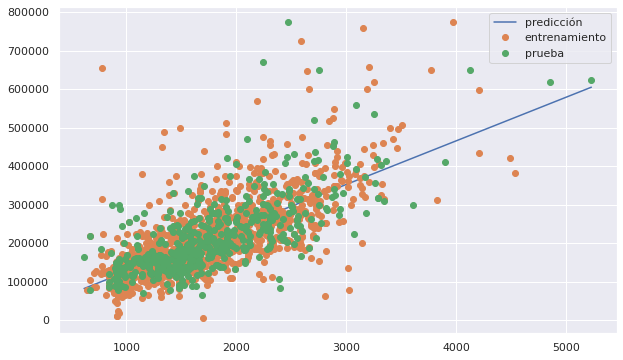

In [ ]:
#Subconjunto D2
d2=datos[["metros_habitables","precio"]]

from sklearn.model_selection import train_test_split
#Se hace el Reshape de la variable X
d2_X=np.array(d2["metros_habitables"])
d2_X= d2_X[:, np.newaxis]
d2_X.shape

#Partición 30-70
X_train_d2, X_test_d2, y_train_d2, y_test_d2 = train_test_split(d2_X, d2["precio"], test_size=0.3, random_state=42)

from sklearn.linear_model import LinearRegression

#Se entrena el modelo
regressor_d2 = LinearRegression()
regressor_d2.fit(X_train_d2, y_train_d2)
print('Pendiente: {}'.format(regressor_d2.coef_[0]))
print('Intersección en y: {}'.format(regressor_d2.intercept_))

from sklearn.metrics import mean_squared_error

pred = regressor_d2.predict(X_test_d2)
print('Error cuadrático medio: {}'.format(mean_squared_error(pred, y_test_d2)))

#Gráfica
from matplotlib import pyplot as plt
import pylab as pl
min_pt = d2_X.min() * regressor_d2.coef_[0] + regressor_d2.intercept_
max_pt = d2_X.max() * regressor_d2.coef_[0] + regressor_d2.intercept_

pl.figure(figsize = (10, 6))
pl.plot([d2_X.min(), d2_X.max()], [min_pt, max_pt], label="predicción")
pl.plot(X_train_d2, y_train_d2, 'o', label="entrenamiento");
pl.plot(X_test_d2, y_test_d2, 'o', label="prueba");
pl.legend(loc='best');

In [ ]:
y=np.array(datos["precio"])
y.shape

(1728,)

In [ ]:
#Modelo Lineal con todas las variables
y=np.array(datos["precio"])
var=np.array(datos.drop(columns=["precio"]))
var.shape
#Partición 30-70
X_train, X_test, y_train, y_test = train_test_split(var, y, test_size=0.3, random_state=42)

#Se entrena el modelo
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print('Pendiente: {}'.format(regressor.coef_[0]))
print('Intersección en y: {}'.format(regressor.intercept_))

from sklearn.metrics import mean_squared_error

pred = regressor.predict(X_test)
print('Error cuadrático medio: {}'.format(mean_squared_error(pred, y_test)))

Pendiente: 73659.18956298733
Intersección en y: -6423.009728514968
Error cuadrático medio: 2268035128.2359076


In [ ]:
#MLP
from sklearn.neural_network import MLPRegressor

mlp_regressor_simple = MLPRegressor(solver='lbfgs', alpha=1e-5, activation='relu',
                                       hidden_layer_sizes=(10), random_state=1)

mlp_regressor_simple.fit(X_train, y_train)

pred = mlp_regressor_simple.predict(X_test)
print('Error cuadrático medio: {}'.format(mean_squared_error(pred, y_test)))

Error cuadrático medio: 3418215585.3464394


In [ ]:
#Se escalan los Datos (Media=0, Varianza=1)
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_x.fit(var)
X_train_s = sc_x.transform(X_train)
X_test_s = sc_x.transform(X_test)

In [ ]:
#Modelo Lineal con todas las variables escaladas

#Se entrena el modelo
regressor = LinearRegression()
regressor.fit(X_train_s, y_train)
print('Pendiente: {}'.format(regressor.coef_[0]))
print('Intersección en y: {}'.format(regressor.intercept_))

from sklearn.metrics import mean_squared_error

pred = regressor.predict(X_test_s)
print('Error cuadrático medio: {}'.format(mean_squared_error(pred, y_test)))

Pendiente: 36829.49610810961
Intersección en y: 211882.5090895231
Error cuadrático medio: 2268035128.235942


In [ ]:
MLPRegressor()

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [ ]:
#MLP 2 capas datos escalados

mlp_regressor_complex = MLPRegressor(solver='lbfgs', alpha=1e-5, activation='relu',
                                       hidden_layer_sizes=(128,512), random_state=1)

mlp_regressor_complex.fit(X_train_s, y_train)

pred = mlp_regressor_complex.predict(X_test_s)
print('Error cuadrático medio: {}'.format(mean_squared_error(pred, y_test)))

Error cuadrático medio: 6996555370.0511


#**Clustering**

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import importlib

from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering, DBSCAN
from IPython.display import HTML


def experiment_number_of_clusters(X, clustering, show_metric=True,
                                  plot_data=True, plot_centers=True, plot_boundaries=False):
    plt.figure(figsize=(15,6))
    for n_clusters in range(2,10):
        clustering.n_clusters = n_clusters
        y = clustering.fit_predict(X)

        cm = plt.cm.plasma
        plt.subplot(2,4,n_clusters-1)

        plot_cluster_predictions(clustering, X, n_clusters, cm, 
                                 plot_data, plot_centers, show_metric)
        
def plot_cluster_predictions(clustering, X, n_clusters = None, cmap = plt.cm.plasma,
                             plot_data=True, plot_centers=True, show_metric=False,
                             title_str=""):

    assert not hasattr(clustering, "n_clusters") or \
           (hasattr(clustering, "n_clusters") and n_clusters is not None), "must specify `n_clusters` for "+str(clustering)

    if n_clusters is not None:
        clustering.n_clusters = n_clusters

    y = clustering.fit_predict(X)
    # remove elements tagged as noise (cluster nb<0)
    X = X[y>=0]
    y = y[y>=0]

    if n_clusters is None:
        n_clusters = len(np.unique(y))

    if plot_data:        
        plt.scatter(X[:,0], X[:,1], color=cmap((y*255./(n_clusters-1)).astype(int)), alpha=.5)
    if plot_centers and hasattr(clustering, "cluster_centers_"):
        plt.scatter(clustering.cluster_centers_[:,0], clustering.cluster_centers_[:,1], s=150,  lw=3,
                    facecolor=cmap((np.arange(n_clusters)*255./(n_clusters-1)).astype(int)),
                    edgecolor="black")   

    if show_metric:
        if hasattr(clustering, 'inertia_'):
          inertia = clustering.inertia_
        else:
          inertia = 0
        sc = silhouette_score(X, y) if len(np.unique(y))>1 else 0
        plt.title("n_clusters %d, inertia=%.0f sc=%.3f"%(n_clusters, inertia, sc)+title_str)
    else:
        plt.title("n_clusters %d"%n_clusters+title_str)

    plt.axis("off")
    return

In [ ]:
X = pd.read_csv("SaratogaHouses.csv", sep=";")
X

,Categoria_Inmueble,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir
0,0,5000,0.29,4,35800,1700,63,3,1,2.5,6,hot air,gas,public/commercial,No,No,Yes
1,0,10300,0.16,20,15700,912,54,2,1,1.5,4,electric,electric,public/commercial,No,No,No
2,0,10300,0.16,20,15700,912,54,2,1,1.5,6,electric,electric,public/commercial,No,No,No
3,0,20000,0.52,59,8000,936,20,2,0,1.0,4,hot air,oil,septic,No,No,No
4,0,25000,0.21,75,900,920,44,2,0,1.0,6,hot air,oil,septic,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,1,670000,0.11,121,87000,2247,62,4,0,2.0,8,hot water/steam,gas,public/commercial,No,No,No
1724,1,725000,0.21,3,70600,2586,62,4,1,3.0,10,hot air,gas,public/commercial,No,No,Yes
1725,1,760000,1.22,2,194700,3148,57,5,0,3.5,12,hot air,gas,septic,No,No,Yes
1726,1,775000,0.00,5,412600,2472,57,3,1,2.5,9,hot air,gas,septic,Yes,No,Yes


In [ ]:
X.columns = ["categoria_precio", "precio", "metros_totales", "antiguedad", "precio_terreno",
                 "metros_habitables", "universitarios", "dormitorios", 
                 "chimenea", "banos", "habitaciones", "calefaccion",
                 "consumo_calefaccion", "desague", "vista_lago",
                 "nueva_construccion", "aire_acondicionado"]

In [ ]:
clean_data = {"calefaccion": {"electric": 1, "hot water/steam": 2, "hot air": 3},
              "consumo_calefaccion": {"electric": 1, "gas": 2, "oil": 3},
              "desague": {"septic": 1, "public/commercial":2, "none": 3},
              "vista_lago": {"No": 1, "Yes":2},         
              "nueva_construccion": {"No": 1, "Yes":2},
              "aire_acondicionado": {"No": 1, "Yes":2}}   

In [ ]:
X.head()

,categoria_precio,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,chimenea,banos,habitaciones,calefaccion,consumo_calefaccion,desague,vista_lago,nueva_construccion,aire_acondicionado
0,0,5000,0.29,4,35800,1700,63,3,1,2.5,6,hot air,gas,public/commercial,No,No,Yes
1,0,10300,0.16,20,15700,912,54,2,1,1.5,4,electric,electric,public/commercial,No,No,No
2,0,10300,0.16,20,15700,912,54,2,1,1.5,6,electric,electric,public/commercial,No,No,No
3,0,20000,0.52,59,8000,936,20,2,0,1.0,4,hot air,oil,septic,No,No,No
4,0,25000,0.21,75,900,920,44,2,0,1.0,6,hot air,oil,septic,No,No,No


In [ ]:
X.replace(clean_data, inplace=True)

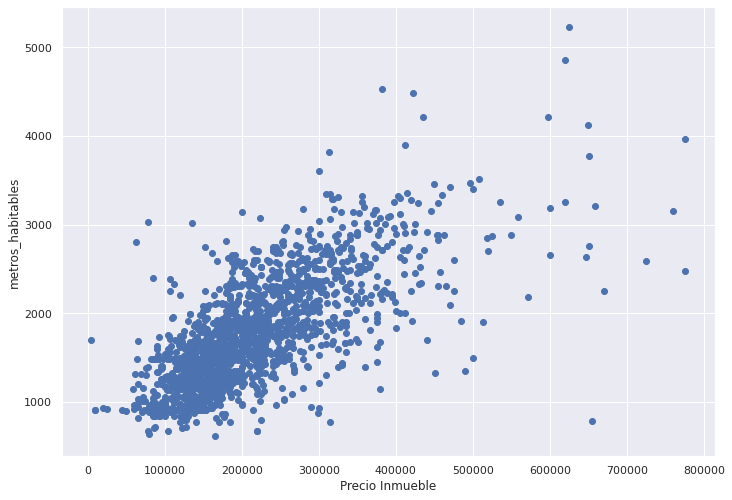

In [ ]:
plt.scatter(X["precio"], X["metros_habitables"])
plt.xlabel("Precio Inmueble")
plt.ylabel("metros_habitables");

In [ ]:
C = X[["precio", "metros_habitables"]]

In [ ]:
n_clusters = 2

km = KMeans( n_clusters=n_clusters)
km.fit(C)
y = km.predict(C)

In [ ]:
pd.Series(y).value_counts() # Número de elementos en cada cluster

1    1272
0     456
dtype: int64

In [ ]:
km.cluster_centers_  # Coordenadas de los centroides

array([[340795.88209607,   2376.98689956],
       [165507.0496063 ,   1530.65984252]])

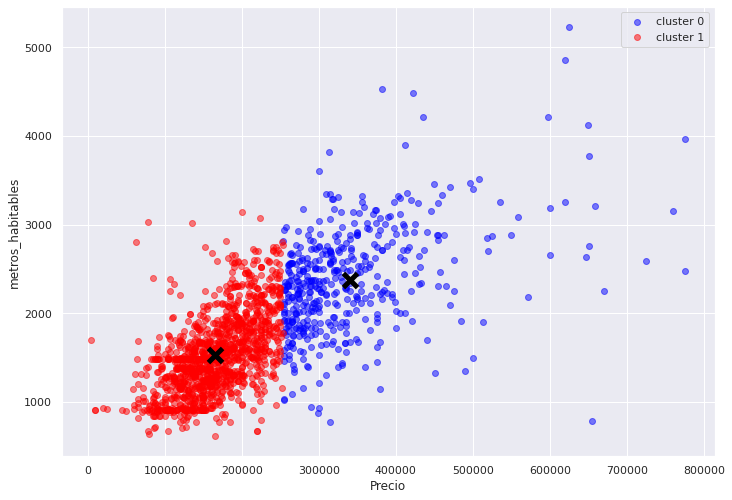

In [ ]:
cmap = plt.cm.plasma

cmap((y*255./(n_clusters-1)).astype(int))
for i in np.unique(y):
    cmap = plt.cm.bwr
    col = cmap((i*255./(n_clusters-1)).astype(int))
    Xr = C[y==i]
    plt.scatter(Xr["precio"], Xr["metros_habitables"], color=col, label="cluster %d"%i, alpha=.5)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],marker="x", lw=5, s=200, color="black")
plt.legend()    
plt.xlabel("Precio")
plt.ylabel("metros_habitables");

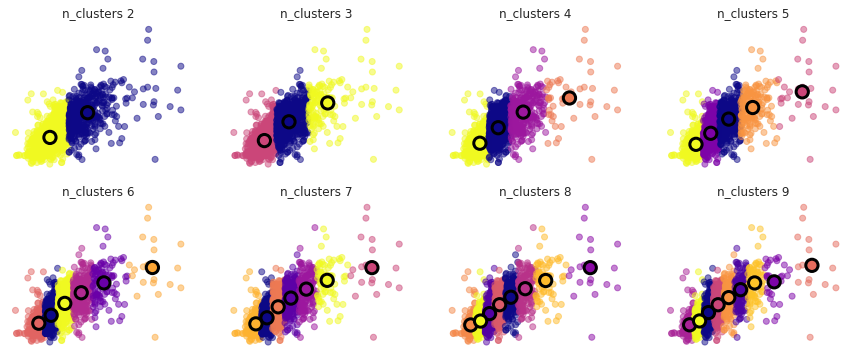

In [ ]:
k=C.values

experiment_number_of_clusters(k, KMeans(), show_metric=False)

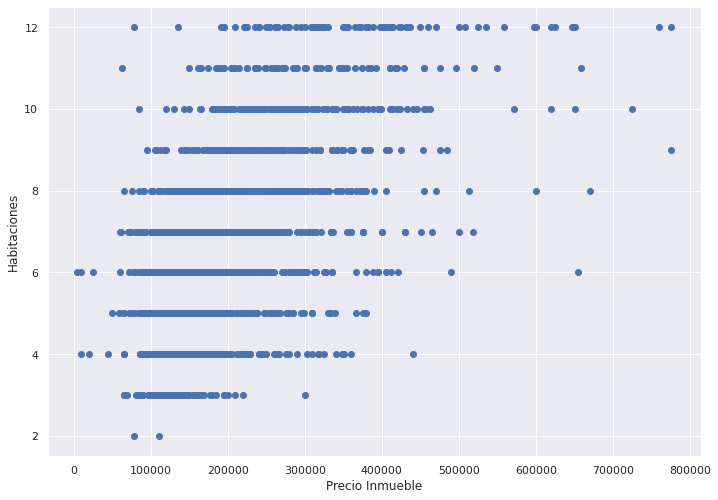

In [ ]:
# Segunda muestra de datos (ejemplo)

plt.scatter(X["precio"], X["habitaciones"])
plt.xlabel("Precio Inmueble")
plt.ylabel("Habitaciones");

In [ ]:
C = X[["precio", "habitaciones"]]

In [ ]:
n_clusters = 2

km = KMeans( n_clusters=n_clusters)
km.fit(C)
y = km.predict(C)

In [ ]:
pd.Series(y).value_counts()

0    1272
1     456
dtype: int64

In [ ]:
km.cluster_centers_

array([[1.65507050e+05, 6.40629921e+00],
       [3.40795882e+05, 8.80349345e+00]])

In [ ]:
km.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 2,
 'n_init': 10,
 'n_jobs': None,
 'precompute_distances': 'auto',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

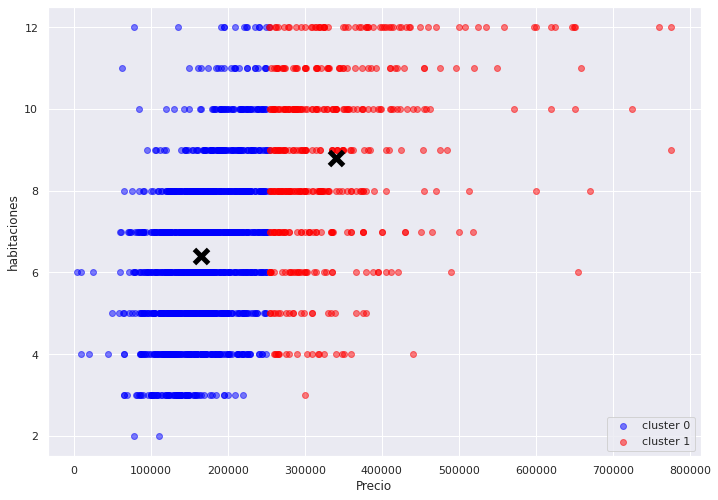

In [ ]:
cmap = plt.cm.plasma

cmap((y*255./(n_clusters-1)).astype(int))
for i in np.unique(y):
    cmap = plt.cm.bwr
    col = cmap((i*255./(n_clusters-1)).astype(int))
    Xr = C[y==i]
    plt.scatter(Xr["precio"], Xr["habitaciones"], color=col, label="cluster %d"%i, alpha=.5)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],marker="x", lw=5, s=200, color="black")
plt.legend()    
plt.xlabel("Precio")
plt.ylabel("habitaciones");

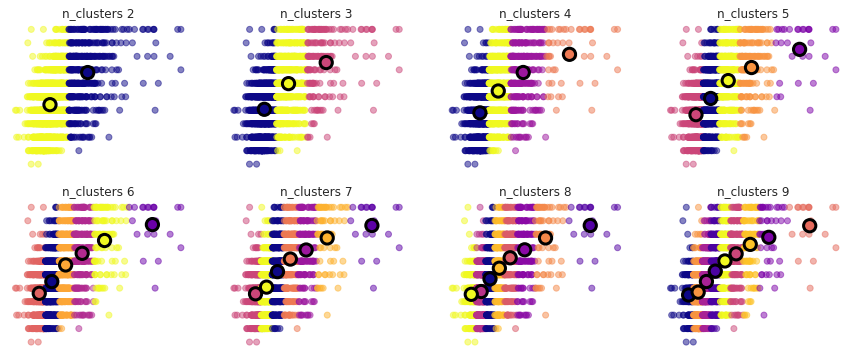

In [ ]:
k=C.values

experiment_number_of_clusters(k, KMeans(), show_metric=False)

###**TODOS LOS DATOS**

In [ ]:
n_clusters = 2

km = KMeans( n_clusters=n_clusters)
km.fit(X)
y = km.predict(X)

In [ ]:
pd.Series(y).value_counts() #número de elementos en cada cluster

0    1287
1     441
dtype: int64

In [ ]:
km.cluster_centers_

array([[3.27117327e-01, 1.66769898e+05, 4.50870241e-01, 3.04250194e+01,
        2.43249573e+04, 1.53817483e+03, 5.46868687e+01, 3.00388500e+00,
        5.10489510e-01, 1.70046620e+00, 6.43123543e+00, 2.37917638e+00,
        1.91686092e+00, 1.69153069e+00, 1.00155400e+00, 1.02020202e+00,
        1.28593629e+00],
       [1.00000000e+00, 3.43867592e+05, 6.44217687e-01, 2.05941043e+01,
        6.44185941e+04, 2.38768027e+03, 5.81383220e+01, 3.59410431e+00,
        8.68480726e-01, 2.48299320e+00, 8.82312925e+00, 2.74376417e+00,
        2.01814059e+00, 1.78684807e+00, 1.02947846e+00, 1.12471655e+00,
        1.60544218e+00]])

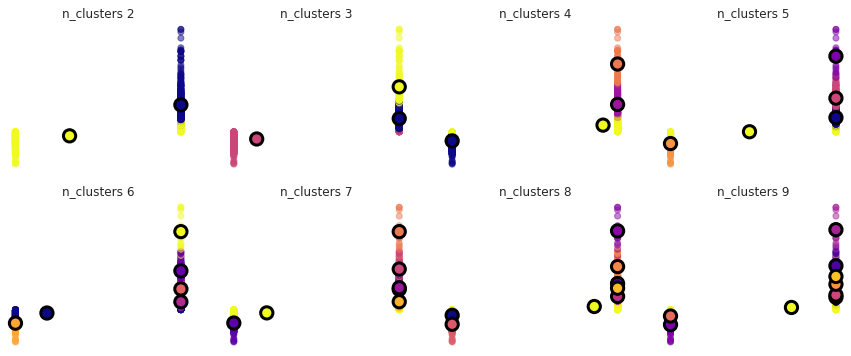

In [ ]:
#Todos los datos

k=X.values

experiment_number_of_clusters(k, KMeans(), show_metric=False)